### 1. Install and Import Dependencies

In [1]:
# pytorch ÏÑ§Ïπò
# conda install pytorch torchvision -c pytorch
# pip3 install torch torchvision

import torch

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# yolov5 repository Î≥µÏ†ú
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: ÎåÄÏÉÅ Í≤ΩÎ°úÍ∞Ä('yolov5') Ïù¥ÎØ∏ ÏûàÍ≥† Îπà ÎîîÎ†âÌÑ∞Î¶¨Í∞Ä ÏïÑÎãôÎãàÎã§.


In [3]:
# requirements.txt ÎÇ¥Î∂ÄÏóê ÏûàÎäî ÎÇ¥Ïö© ÏÑ§Ïπò
!cd yolov5 & pip install -r requirements.txt  # install

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [4]:
!pip install opencv-python

In [5]:
import torch  # will be used to load the yolo model and make detections
from matplotlib import pyplot as plt  # will be used for visualizing images
import numpy as np  # will be used for array transformation
import cv2  # helps access the webcam and render feeds

### 2. Load Model

In [9]:
# pytorch hub : ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ Ï†ÄÏû•ÏÜåÏóê Î™®Îç∏ÏùÑ Í≤ÄÏÉâÌïòÍ≥† Í≥µÍ∞úÌïòÎäî Í≥≥
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Ïã§Ï†úÎ°ú torch hubÏóêÏÑú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Ï¥àÍ≤ΩÎüâ Î™®Îç∏ÏùÑ Î°úÎìúÌïòÎäî Í≤É
model

Using cache found in /Users/mac/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 üöÄ 2022-8-15 Python-3.9.7 torch-1.12.1 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

### 3. Make Detections with Images

In [17]:
# Ï¥àÍ∏∞ Í∞êÏßÄÎ•º ÏàòÌñâÌïòÎäî Í≤É
# ÏòàÎ•º Îì§Ïñ¥, Ïù¥ÎØ∏ÏßÄ ÎÇ¥Î∂ÄÏùò ÏùºÎ∂Ä Ìï≠Î™©ÏùÑ Í∞êÏßÄÌïòÍ≥† Ïã∂ÏùÑ Îïå

In [18]:
# Í≥µÏãù Î¨∏ÏÑúÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
# ms-coco class : Î©∞Ïπ†ÎèôÏïà Ïã§Ï†úÎ°ú ÍµêÌÜµ ÎπÑÎîîÏò§ÏóêÏÑú ÏûêÎèôÏ∞®Î•º Ï†ïÎßê Ïûò Ïû°Ïùå
img = 'https://ultralytics.com/images/zidane.jpg'

In [19]:
results = model(img)
results.print()
# Ïù¥ÎØ∏ÏßÄ 1Í∞úÎßå ÌÜµÍ≥º : Ïù¥ÎØ∏ÏßÄ ÏπòÏàò, Îëê ÏÇ¨ÎûåÍ≥º Îëê Í∞úÏùò ÎÑ•ÌÉÄÏù¥Í∞Ä Í∞êÏßÄÎê®

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1317.7ms pre-process, 119.9ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


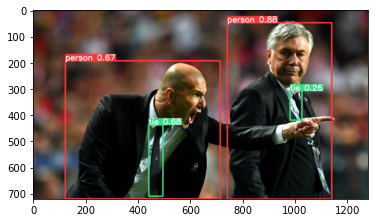

In [27]:
# Ïã§Ï†ú Î†åÎçîÎßÅ
# matplotlibÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù∏ÎùºÏù∏ÏúºÎ°ú Î†åÎçîÎßÅ Ìï† Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [28]:
results.xyxy
# xyxy : ÌäπÏ†ï Î™®Îç∏Ïóê ÎåÄÌïú Ï¢åÌëú Ï†úÍ≥µ [xmin, ymin, xmax, ymax, confidence, class]

[tensor([[7.42975e+02, 4.83955e+01, 1.14184e+03, 7.20000e+02, 8.81053e-01, 0.00000e+00],
         [4.42008e+02, 4.37522e+02, 4.96654e+02, 7.09974e+02, 6.75214e-01, 2.70000e+01],
         [1.23024e+02, 1.93287e+02, 7.15662e+02, 7.19724e+02, 6.65812e-01, 0.00000e+00],
         [9.82803e+02, 3.08417e+02, 1.02737e+03, 4.19987e+02, 2.60076e-01, 2.70000e+01]])]

In [29]:
results.show()
# ÎÇ¥Î∂ÄÏùò Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄÎ•º Î≥ÑÎèÑÎ°ú Ïó¨Îäî Í≤É

In [30]:
results.render()
# Ïù¥ÎØ∏ÏßÄÏùò Î∞∞Ïó¥ ÌëúÌòÑ
# Ïã§Ï†úÎ°ú Í∞êÏßÄÍ∞Ä Í∑∏Î†§ÏßÑ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ•º Î∞òÌôòÌï† Í≤É

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [31]:
np.array(results.render()).shape  # (1, 720, 1280, 3)
np.squeeze(results.render()).shape  # (720, 1280, 3) Íµ¨ÏÑ±ÏöîÏÜåÎßå Ï∂îÏ∂ú

(720, 1280, 3)

In [36]:
# car traffic
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/1599px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg?20190503075536'

In [37]:
results = model(img)
results.print()

image 1/1: 1066x1599 1 person, 31 cars, 4 trucks
Speed: 785.9ms pre-process, 150.0ms inference, 11.6ms NMS per image at shape (1, 3, 448, 640)


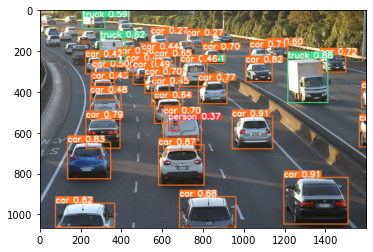

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

### 4. Real Time Detections

In [ ]:
# opencvÎ•º ÌôúÏö©ÌïòÏó¨ Ïã§ÏãúÍ∞ÑÏúºÎ°ú ÏàòÌñâÌïòÍ∏∞
# opencv : Ïã§ÏãúÍ∞Ñ Ïù¥ÎØ∏ÏßÄ ÌîÑÎ°úÏÑ∏Ïã±Ïóê Ï§ëÏ†êÏùÑ Îëî ÎùºÏù¥Î∏åÎü¨Î¶¨
# Ïã§Ï†úÎ°ú ÏõπÏ∫†ÏóêÏÑú Ïù¥ÎØ∏ÏßÄÏóê ÏóëÏÑ∏Ïä§ Ìï† Ïàò ÏûàÎäî ÏùºÎ∞òÏ†ÅÏù∏ opencv Î£®ÌîÑÎ•º ÏÇ¨Ïö©Ìï¥ Í∏∞Î≥∏ Î™®Îç∏Î°ú ÏàòÌñâ
cap = cv2.VideoCapture(0)  # ÎÇ¥ ÏõπÏ∫†Ïù¥ VideoCapture Ïû•ÏπòÍ∞Ä 0Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïö∞Î¶¨Ïùò ÏõπÏ∫†Ïóê ÏóëÏÑ∏Ïä§ÌïòÎäî Í≤É / Ïã§ÏãúÍ∞Ñ ÌîºÎìúÎ•º ÏñªÏßÄ Î™ªÌïòÎ©¥ Îã§Ïãú Ïû¨ÏÉù
while cap.isOpened():  # capÏù¥ Ïó¥Î†§ÏûàÎäî ÎèôÏïà cap.read()Î•º ÏùΩÍ≥† Ìï¥Îãπ Ï∫°Ï≤ò Ïû•ÏπòÏóêÏÑú Î≥ÄÏàòÎ•º Ï∂îÏ∂úÌïòÍ±∞ÎÇò ÏïïÏ∂ï ÌíÄÍ∏∞
    ret, frame = cap.read()  # Î∞òÌôò Í∞íÏùÄ ÏõπÏ∫†Ïùò ÌîÑÎ†àÏûÑ ÎòêÎäî Ïù¥ÎØ∏ÏßÄÏôÄ Ìï®Íªò Î∞òÌôò
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))  # frame Ïù¥Î¶ÑÏùÑ ÌÜµÌï¥ Ï†ÑÎã¨Îêú cv2.imshowÏù¥ÎØÄÎ°ú Ïã§Ï†úÎ°ú Î†åÎçîÎßÅ Ìï† Îïå ÌåùÏóÖÏù¥ ÌëúÏãúÎêòÍ≥† ÏÉÅÎã® ÌëúÏãúÏ§ÑÏùò Ïù¥Î¶ÑÏùÄ YOLOÎ°ú Îú∏
    
    if cv2.waitKey(10) & 0xFF == ord('q'):  # Ï¢ÖÎ£å, Î£®ÌîÑ Î≤óÏñ¥ÎÇòÍ∏∞
        break

cap.release()  # Ï∫°Ï≤ò Ïû•Ïπò, ÏõπÏ∫† Ìï¥Ï†ú 
cv2.waitKey(0)
cv2.destroyAllWindows() # Ï∞Ω Îã´Í∏∞
cv2.waitKey(0)

### 5. Train from scratch

In [ ]:
# Ïª§Ïä§ÌÖÄ Î™®Îç∏ÏùÑ Ïã§Ï†úÎ°ú ÌõàÎ†®ÏãúÌÇ§Îäî Í≤É
# ÏúÑÏôÄ ÎèôÏùºÌïú Î£®ÌîÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï°∏Ïùå Î∞è Ï°∏Î¶¨ÏßÄ ÏïäÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏßë
# Ïã§ÏãúÍ∞Ñ ÌîºÎìúÎ•º Ï∫°Ï≤òÌï† ÎøêÎßå ÏïÑÎãàÎùº Îã§Î•∏ ÌÅ¥ÎûòÏä§Ïùò Ïù¥ÎØ∏ÏßÄÎèÑ Ï†ÄÏû•ÌïòÎèÑÎ°ù ÏΩîÎìú ÏóÖÎç∞Ïù¥Ìä∏

In [6]:
import uuid   # Unique identifier(Í≥†Ïú† ÏãùÎ≥ÑÏûê ÏÉùÏÑ±)
import os
import time

In [7]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(0)

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

### 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Ïù¥ÌõÑ Í≥ÑÌöç : Ïö¥Ï†Ñ Ï°∏Ïùå Î∞©ÏßÄ Í∞êÏßÄ ÏãúÏä§ÌÖú ÏÉùÏÑ± ÌîÑÎ°úÏ†ùÌä∏